In [352]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
import re
from tqdm import tqdm

In [353]:
df = pd.read_csv('Fashion Dataset.csv')

df.head()

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."


idx  13696
img_id  14860462
Original: (1080, 1440)
Resized: (224, 224)


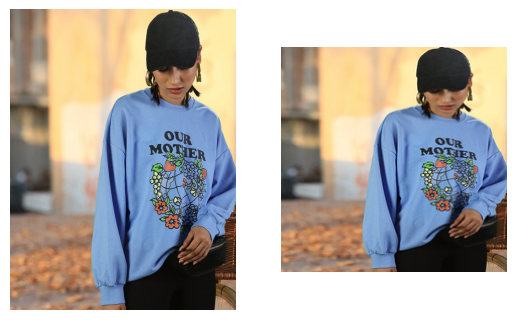

In [354]:
idx = random.randint(0,df.shape[0])
img_id = int(df['p_id'][idx])
print("idx ", idx)
print("img_id ",img_id)

img = Image.open(f"images/{img_id}.jpg").convert("RGB")

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis("off")
print("Original:", img.size)

img_resized = img.resize((224, 224), Image.LANCZOS)

plt.subplot(1, 2, 2)
plt.imshow(img_resized)
plt.axis("off")
print("Resized:", img_resized.size)

In [355]:
for col in df.columns:
    print(col, " ---> ", df[col][idx])


Unnamed: 0  --->  356
p_id  --->  14860462.0
name  --->  Levis Women Blue Round Neck Printed Sweatshirt
price  --->  2799.0
colour  --->  Blue
brand  --->  Levis
img  --->  http://assets.myntassets.com/assets/images/14860462/2021/12/13/740183e5-b19b-4d12-acc0-dbe070907cf01639398121187-Levis-Women-Blue-Round-Neck-Printed-Sweatshirt-7431639398120-1.jpg
ratingCount  --->  32.0
avg_rating  --->  4.1875
description  --->  <ul><li>Blue typography and floral printed sweatshirt</li><li>Round neck</li><li>Long sleeves</li><li>Pullover</li><li>Ribbed hem</li></ul>80% Cotton, 20% Polyester<br>Machine wash<br>Do not bleach<br>Tumble dry low<br>Warm ironThe model (height 5'8) is wearing a size S
p_attributes  --->  {'Body Shape ID': '443,424,324', 'Body or Garment Size': 'Garment Measurements in', 'Center Front Open': 'No', 'Character': 'NA', 'Closure': 'NA', 'Fabric': 'Cotton', 'Hemline': 'Ribbed', 'Hood': 'NA', 'Length': 'Regular', 'Multipack Set': 'NA', 'Neck': 'Round Neck', 'Number of Pockets':

In [356]:
print(df['p_id'].isna().sum())


18


In [357]:
new_df = df.dropna(subset=['p_id'])

In [358]:
new_df['p_id'].isna().sum()

np.int64(0)

In [359]:
len(new_df) - new_df['p_id'].nunique()

89

In [360]:
new_df = new_df.drop_duplicates(subset=['p_id'], keep='first')

In [361]:
new_df['price'].isna().sum()

np.int64(0)

In [362]:
new_df['price'].describe()

count    14223.000000
mean      2970.093511
std       2569.654728
min        169.000000
25%       1599.000000
50%       2215.000000
75%       3498.000000
max      47999.000000
Name: price, dtype: float64

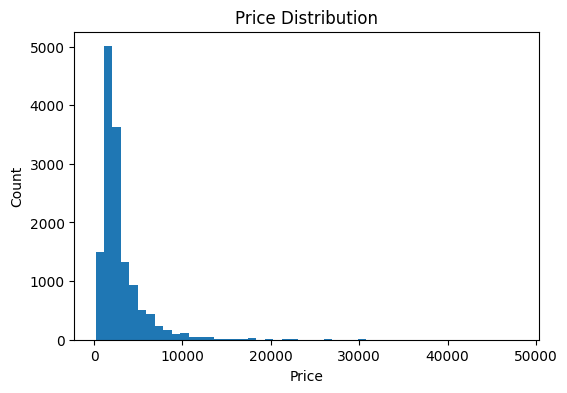

In [363]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(new_df['price'], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.show()

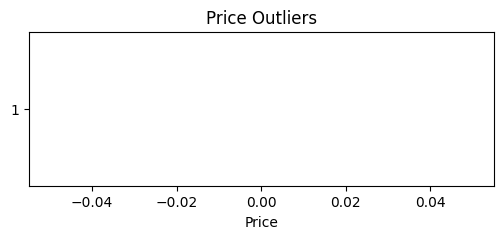

In [364]:
plt.figure(figsize=(6,2))
plt.boxplot(df['price'], vert=False)
plt.xlabel("Price")
plt.title("Price Outliers")
plt.show()


In [365]:
new_df['log_price'] = np.log1p(new_df['price'])

new_df['log_price'].describe()

count    14223.000000
mean         7.771080
std          0.636719
min          5.135798
25%          7.377759
50%          7.703459
75%          8.160232
max         10.778956
Name: log_price, dtype: float64

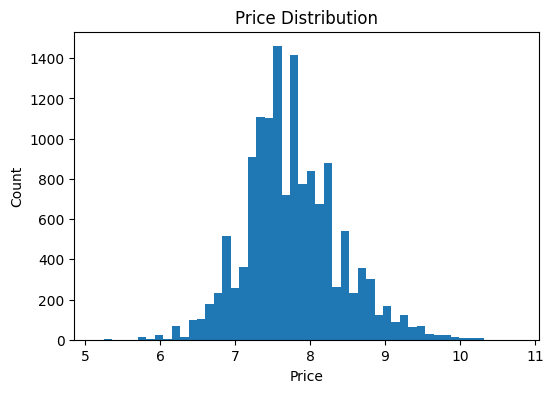

In [366]:
plt.figure(figsize=(6,4))
plt.hist(new_df['log_price'], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.show()

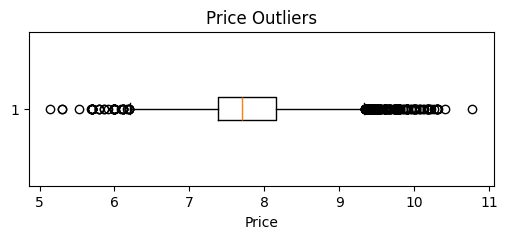

In [367]:
plt.figure(figsize=(6,2))
plt.boxplot(new_df['log_price'], vert=False)
plt.xlabel("Price")
plt.title("Price Outliers")
plt.show()


In [368]:
new_df['colour'].describe()

count     14220
unique       49
top       Black
freq       1902
Name: colour, dtype: object

In [369]:
new_df['colour'].isna().sum()

np.int64(3)

In [370]:
new_df = new_df.dropna(subset=['colour'])

In [371]:
new_df['colour'].value_counts()

colour
Black                1902
Blue                 1804
Pink                 1171
Green                1083
Navy Blue             842
White                 807
Red                   708
Grey                  571
Maroon                521
Yellow                496
Beige                 486
Mustard               325
Off White             313
Peach                 300
Purple                294
Orange                287
Olive                 252
Brown                 250
Teal                  192
Cream                 157
Multi                 147
Burgundy              144
Sea Green             115
Turquoise Blue        113
Rust                  108
Lavender               99
Gold                   91
Magenta                86
Charcoal               84
Coral                  81
Fuchsia                52
Mauve                  51
Lime Green             50
Rose                   44
Grey Melange           43
Khaki                  27
Coffee Brown           25
Taupe                  18
Fluor

In [372]:
df['brand'].describe()

count        14312
unique        1022
top       Roadster
freq           346
Name: brand, dtype: object

In [373]:
df['brand'].value_counts()

brand
Roadster                     346
Tokyo Talkies                287
MANGO                        264
SASSAFRAS                    247
Clora Creation               236
                            ... 
IUGA                           1
KBZ                            1
Remanika                       1
CACA CINA                      1
Kook N Keech Looney Tunes      1
Name: count, Length: 1022, dtype: int64

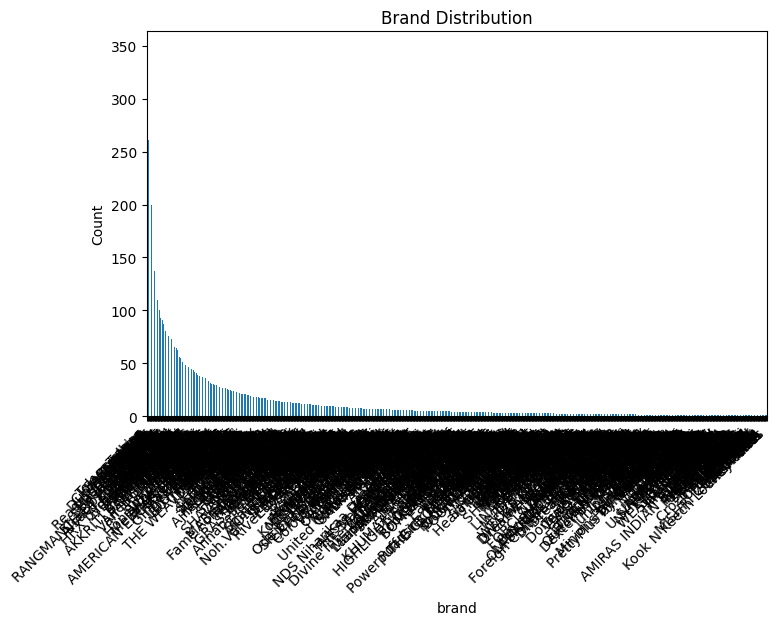

In [374]:

top_colours = new_df['brand'].value_counts()

plt.figure(figsize=(8, 5))
top_colours.plot(kind='bar')
plt.xlabel("brand")
plt.ylabel("Count")
plt.title(f"Brand Distribution")
plt.xticks(rotation=45, ha='right')
plt.show()

In [375]:
new_df['brand'].value_counts().to_list()

[346,
 284,
 261,
 242,
 234,
 232,
 204,
 200,
 200,
 171,
 157,
 151,
 137,
 134,
 124,
 119,
 113,
 110,
 107,
 104,
 100,
 95,
 93,
 93,
 91,
 91,
 87,
 87,
 85,
 82,
 81,
 81,
 81,
 78,
 77,
 76,
 75,
 75,
 75,
 74,
 73,
 72,
 69,
 69,
 68,
 66,
 66,
 65,
 65,
 64,
 63,
 63,
 59,
 56,
 56,
 55,
 55,
 52,
 51,
 50,
 50,
 50,
 49,
 49,
 49,
 48,
 48,
 47,
 47,
 47,
 47,
 46,
 45,
 45,
 45,
 44,
 44,
 43,
 42,
 42,
 42,
 41,
 39,
 39,
 39,
 38,
 38,
 38,
 38,
 37,
 37,
 37,
 37,
 36,
 36,
 36,
 36,
 35,
 34,
 33,
 33,
 33,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,

### It would be much better to add brand name of a product into discription long with the name and color

In [376]:
new_df.columns

Index(['Unnamed: 0', 'p_id', 'name', 'price', 'colour', 'brand', 'img',
       'ratingCount', 'avg_rating', 'description', 'p_attributes',
       'log_price'],
      dtype='object')

In [377]:
df['ratingCount'].describe()

count     6581.000000
mean       184.479410
std        782.501137
min          1.000000
25%          9.000000
50%         23.000000
75%         80.000000
max      21274.000000
Name: ratingCount, dtype: float64

In [378]:
df['ratingCount'].isnull().sum()

np.int64(7749)

### Since rating count will not be much usefull in our training, it can be a good tool for filtering, but not now. Also, many of the rows are NULL in this column, it would be better to drop it.

In [379]:
new_df = new_df.drop(columns=['ratingCount','img'])

In [380]:
new_df.columns

Index(['Unnamed: 0', 'p_id', 'name', 'price', 'colour', 'brand', 'avg_rating',
       'description', 'p_attributes', 'log_price'],
      dtype='object')

In [381]:
new_df['avg_rating'].isnull().sum()

np.int64(7685)

In [382]:
new_df = new_df.drop(columns=['avg_rating'])

In [383]:
import ast

attr_str = df.loc[100, 'p_attributes']
attr_dict = ast.literal_eval(attr_str)
i=0
for key, value in attr_dict.items():
    print(key,':', value)

Add-Ons : NA
Body Shape ID : 333,424
Body or Garment Size : Garment Measurements in
Bottom Closure : Zip
Bottom Fabric : Pure Silk
Bottom Pattern : Self Design
Bottom Type : Trousers
Character : NA
Dupatta : With Dupatta
Dupatta Border : Taping
Dupatta Fabric : Organza
Dupatta Pattern : Solid
Main Trend : NA
Neck : Round Neck
Number of Pockets : NA
Occasion : Festive
Ornamentation : NA
Pattern Coverage : None
Print or Pattern Type : Woven Design
Sleeve Length : Three-Quarter Sleeves
Sleeve Styling : Regular Sleeves
Slit Detail : NA
Stitch : Ready to Wear
Sustainable : Regular
Technique : NA
Top Design Styling : Regular
Top Fabric : Pure Silk
Top Hemline : Straight
Top Length : Calf Length
Top Pattern : Solid
Top Shape : A-Line
Top Type : Kurta
Waistband : Partially Elasticated
Wash Care : Dry Clean
Weave Pattern : Regular
Weave Type : Machine Weave
Wedding : Bride & Wedding Squad


In [384]:
df['p_attributes'][130]


"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,324,424', 'Body or Garment Size': 'Garment Measurements in', 'Bottom Closure': 'Slip-On', 'Bottom Fabric': 'Poly Georgette', 'Bottom Pattern': 'Self Design', 'Bottom Type': 'Skirt', 'Character': 'NA', 'Dupatta': 'With Dupatta', 'Dupatta Border': 'Taping', 'Dupatta Fabric': 'Poly Chiffon', 'Dupatta Pattern': 'Solid', 'Main Trend': 'NA', 'Neck': 'V-Neck', 'Number of Pockets': 'NA', 'Occasion': 'Daily', 'Ornamentation': 'NA', 'Pattern Coverage': 'None', 'Print or Pattern Type': 'Solid', 'Sleeve Length': 'Short Sleeves', 'Sleeve Styling': 'Regular Sleeves', 'Slit Detail': 'Front Slit', 'Stitch': 'Ready to Wear', 'Sustainable': 'Regular', 'Technique': 'NA', 'Top Design Styling': 'Pleated', 'Top Fabric': 'Poly Georgette', 'Top Hemline': 'Flared', 'Top Length': 'Floor Length', 'Top Pattern': 'Solid', 'Top Shape': 'Anarkali', 'Top Type': 'Kurta', 'Waistband': 'Elasticated', 'Wash Care': 'Machine Wash', 'Weave Pattern': 'Regular', 'Weave Type': 'Mach

## Feature Engineering: Multimodal Text Synthesis & Noise Reduction

In this section, we prepare the textual metadata for the **CLIP (Contrastive Language-Image Pre-training)** encoder. 
Since CLIP has a **77-token limit**, we cannot simply concatenate all raw data. 

### Why we are doing this:
1. **Semantic Fusion:** By merging Brand, Color, Name, and Attributes, we provide the model with a holistic "natural language" prompt rather than isolated tags.
2. **Feature Prioritization:** We rearrange the `p_attributes` to place visually significant features (like *Top Type*, *Shape*, and *Fabric*) at the beginning of the string to ensure they aren't lost if truncation occurs.
3. **Denoising:** We strip HTML tags from descriptions and remove 'NA' or low-signal values (like 'Body Shape ID' or 'Wash Care') to maximize the "information density" of our vectors.
4. **Consistency:** This unified text column will be used to generate embeddings that live in the same vector space as our product images, enabling more accurate recommendations.

In [385]:
# Function to clean HTML from descriptions
def clean_description(text):
    if not isinstance(text, str): return ""
    # Remove HTML tags and extra whitespace
    clean = re.sub(r'<.*?>', '', text)
    return " ".join(clean.split())

In [386]:
# Function to extract priority attributes from the dictionary string
def process_attributes(attr_str):
    if not isinstance(attr_str, str) or attr_str == "NA":
        return ""
    
    try:
        data = ast.literal_eval(attr_str)
    except (ValueError, SyntaxError):
        return ""

    # Priority order: Visual and structural features first
    priority_keys = [
        'Top Type', 'Bottom Type', 'Top Shape', 'Top Fabric', 
        'Bottom Fabric', 'Occasion', 'Neck', 'Sleeve Length', 
        'Print or Pattern Type'
    ]
    
    parts = []
    seen_values = set()
    
    # Extract priority values
    for key in priority_keys:
        val = data.get(key)
        if val and val != "NA" and val not in seen_values:
            parts.append(str(val))
            seen_values.add(val)
            
    return ", ".join(parts)

In [387]:
new_df['cleaned_attributes'] = new_df['p_attributes'].apply(process_attributes)
new_df['cleaned_description'] = new_df['description'].apply(clean_description)

In [388]:
new_df.columns

Index(['Unnamed: 0', 'p_id', 'name', 'price', 'colour', 'brand', 'description',
       'p_attributes', 'log_price', 'cleaned_attributes',
       'cleaned_description'],
      dtype='object')

In [389]:
def create_smart_prefix(row):
    color = str(row['colour']).strip()
    brand = str(row['brand']).strip()
    name = str(row['name']).strip()
    
    # Start with the name
    final_str = name
    
    # Only add brand if it's not already in the name (case-insensitive)
    if brand.lower() not in name.lower():
        final_str = f"{brand} {final_str}"
        
    # Only add color if it's not already in the name
    if color.lower() not in name.lower():
        final_str = f"{color} {final_str}"
        
    return final_str

In [390]:
new_df['cleaned_text'] = new_df.apply(create_smart_prefix, axis=1)

new_df['final_text'] = (
    "A "+ new_df['cleaned_text'].fillna('') + ". " + 
    "Features: " + new_df['cleaned_attributes'] + ". " + 
    new_df['cleaned_description']
)

In [391]:
# Keep it concise for CLIP
new_df['final_text'] = new_df['final_text'].str.slice(0, 400) # Safety truncation before tokenization

print("Success! 'final_text' column is ready for CLIP embedding.")

Success! 'final_text' column is ready for CLIP embedding.


In [401]:
for col in new_df.columns:
    print(col, " ---> ", new_df[col][700])

Unnamed: 0  --->  700
p_id  --->  19040576.0
price  --->  3595.0
brand  --->  KARAJ JAIPUR
log_price  --->  8.18757739559151
cleaned_description  --->  Mustard yellow yoke design Kurta with Palazzos with dupattaKurta design: Geometric yoke designA-line shapeRegular styleRound neck,&nbsp;regular sleevespocketsCalf length with straight hemPure cotton machine weave fabricPalazzos design: Printed PalazzosElasticated waistbandSlip-on closureCottonDry CleanThe model (height 5'8) is wearing a size S
final_text  --->  A KARAJ JAIPUR Women Mustard Yellow Yoke Design Pure Cotton Kurta with Palazzos & Dupatta. Features: Kurta, Palazzos, Straight, Pure Cotton, Daily, Round Neck, Three-Quarter Sleeves, Floral. Mustard yellow yoke design Kurta with Palazzos with dupattaKurta design: Geometric yoke designA-line shapeRegular styleRound neck,&nbsp;regular sleevespocketsCalf length with straight hemPure cotton machine we


In [394]:
new_df = new_df.drop(columns=['name','colour','p_attributes','description', 'cleaned_attributes', 'cleaned_text'])

In [395]:
new_df.columns

Index(['Unnamed: 0', 'p_id', 'price', 'brand', 'log_price',
       'cleaned_description', 'final_text'],
      dtype='object')

In [396]:
new_df.to_csv('Fashion_Dataset_V2.csv')